In [2]:
from cryo_fts.lockin import LockinController
from cryo_fts.mirror import MirrorController
from cryo_fts.encoder import EncoderController
from cryo_fts.motor import MotorController
import time
import pandas as pd
#mirror = MirrorController()
#lockin = LockinController(gpib_address=8)
motor = MotorController()

Established connection to Device 1 SN: 83850 (X-LSM200A-SV2) -> Connection 3 (ASCII Serial port: COM3) on Connection 3 (ASCII Serial port: COM3)


In [3]:
motor.init()
motor.move_absolute(100, length_unit=None)

In [ ]:
import serial.tools.list_ports
ports = list(serial.tools.list_ports.comports())
for p in ports:
    print(p.device, p.description)

COM4 STMicroelectronics Virtual COM Port (COM4)
COM5 USB Serial Port (COM5)
COM3 USB Serial Port (COM3)


In [2]:
#mirror.init()
mirror.scan_and_collect(velocity=10, sample_rate=5)
time.sleep(10) 
mirror.stop_scan()
mirror.close()

Exception in thread Thread-3 (_scan_worker):
Traceback (most recent call last):
  File "c:\Users\vnh2\Desktop\FTS\cryo_fts\src\mirror.py", line 90, in _scan_worker
    self.motor.move_velocity(velocity, velocity_unit)
    ~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\vnh2\Desktop\FTS\cryo_fts\src\motor.py", line 137, in move_velocity
    self._check_axis_status()
    ~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\Users\vnh2\Desktop\FTS\cryo_fts\src\motor.py", line 101, in _check_axis_status
    raise RuntimeError('Axis not initialized.')
RuntimeError: Axis not initialized.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\vnh2\AppData\Local\miniconda3\envs\fts\Lib\threading.py", line 1043, in _bootstrap_inner
    self.run()
    ~~~~~~~~^^
  File "c:\Users\vnh2\AppData\Local\miniconda3\envs\fts\Lib\site-packages\ipykernel\ipkernel.py", line 772, in run_closure
    _threading_Thread_run(self)
    ~~~~~~~~~

Continuous transmission started.
Read loop error: 'EncoderController' object has no attribute 'buffer_lock'
Read loop error: 'EncoderController' object has no attribute 'buffer_lock'
Read loop error: 'EncoderController' object has no attribute 'buffer_lock'
Read loop error: 'EncoderController' object has no attribute 'buffer_lock'
Read loop error: 'EncoderController' object has no attribute 'buffer_lock'
Read loop error: 'EncoderController' object has no attribute 'buffer_lock'
Read loop error: 'EncoderController' object has no attribute 'buffer_lock'
Read loop error: 'EncoderController' object has no attribute 'buffer_lock'
Read loop error: 'EncoderController' object has no attribute 'buffer_lock'
Read loop error: 'EncoderController' object has no attribute 'buffer_lock'
Read loop error: 'EncoderController' object has no attribute 'buffer_lock'
Read loop error: 'EncoderController' object has no attribute 'buffer_lock'
Read loop error: 'EncoderController' object has no attribute 'buffe

In [ ]:
lockin.init()

Lock-in ID: Stanford_Research_Systems,SR865A,006369,1.55


In [ ]:
freq = lockin.write('FREQ?', read=True)
print("Reference Frequency (Hz):", freq)

Reference Frequency (Hz): 47.946159363


In [ ]:
lockin.get_x_y_r_theta()

(5.379981971e-08, 1.5550888577e-07, 1.6455221896e-07, 70.916435242)

In [ ]:
lockin.set_freq(900)
lockin.get_freq()

1220.703125

In [ ]:
lockin.get_amp()

0.012299999595

In [ ]:
lockin.set_amp(0.0123)

In [ ]:
lockin.set_timeconstant(8)
lockin.get_timeconstant()

8.0

In [ ]:
lockin.set_sens(20)
lockin.get_sens()

20.0

In [ ]:
lockin.start_transmission(sample_rate= 10)
time.sleep(5)
lockin.stop_transmission()


Continuous transmission started.
Continuous transmission stopped.


In [ ]:
data = lockin.get_all()
print(data)

[{'timestamp': 1757710578.700898, 'x': 2.6661496122e-07, 'y': -1.3448176617e-07, 'r': 2.9861161011e-07, 'theta': -26.766576767}, {'timestamp': 1757710578.8329692, 'x': -3.0689969321e-07, 'y': -1.8301832938e-07, 'r': 3.5732776382e-07, 'theta': -149.19044495}, {'timestamp': 1757710578.9624653, 'x': 2.4852823799e-07, 'y': 6.4983758818e-08, 'r': 2.5688356686e-07, 'theta': 14.653312683}, {'timestamp': 1757710579.0894275, 'x': 1.3779398955e-07, 'y': -2.1672694572e-07, 'r': 2.5682243177e-07, 'theta': -57.55198288}, {'timestamp': 1757710579.2189715, 'x': -4.6896735384e-09, 'y': -6.2719777816e-08, 'r': 6.2894855546e-08, 'theta': -94.276145935}, {'timestamp': 1757710579.350185, 'x': 3.6354239796e-07, 'y': -1.2987352704e-07, 'r': 3.8604432007e-07, 'theta': -19.658988953}, {'timestamp': 1757710579.4827163, 'x': -2.6979810386e-08, 'y': -2.4604887017e-07, 'r': 2.4752367267e-07, 'theta': -96.257606506}, {'timestamp': 1757710579.6223652, 'x': 1.8264447021e-07, 'y': 2.488822588e-07, 'r': 3.0870921819e-

In [ ]:
encoder.start_transmission()
time.sleep(5)
encoder.stop_transmission()
encoder.get_latest()


Continuous transmission started.
Continuous transmission stopped.


(1757711007.9363556, 22701925)

In [14]:
import numpy as np
import pandas as pd

data = np.load('../data/trial-run-diode.npz')
# df = pd.DataFrame('../data/trial-run-diode.npz')
R = data['R_V']

c:\Users\vnh2\AppData\Local\miniconda3\envs\fts\Lib\site-packages\matplotlib\cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\vnh2\AppData\Local\miniconda3\envs\fts\Lib\site-packages\matplotlib\cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


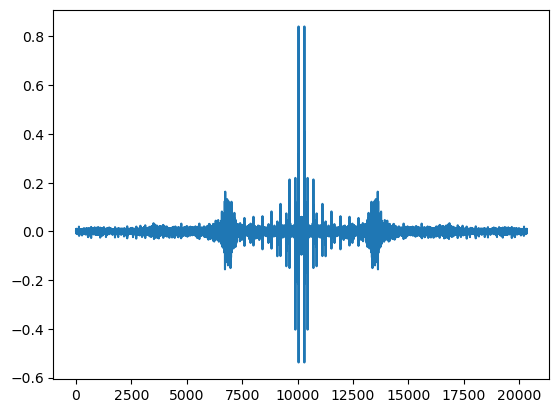

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(np.fft.fftshift(np.fft.fft(R - np.mean(R), len(R))))
# np.fft.fftfreq()
plt.show()